In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import matplotlib.pyplot as plt

from frust.transformers import transformer_mols
from frust.embedder import embed_mols

In [3]:
data = pd.read_csv("../datasets/ir_borylation.csv")
#data = pd.read_csv("../datasets/font_smiles.csv")

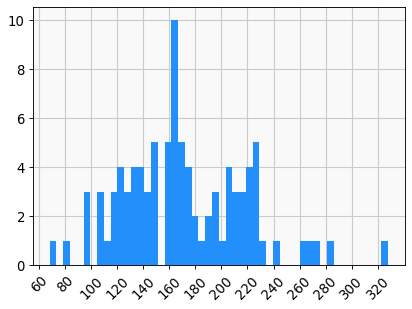

In [4]:
smi_list = list(data["smiles"])
mol_list = [(Chem.MolFromSmiles(smi), smi) for smi in smi_list]

mw_list = []
for m, _ in mol_list:
    if m is None:
        mw_list.append(None)
    else:
        mw_list.append(Descriptors.MolWt(m))

plt.hist(mw_list, bins=50)
plt.xticks(ticks=range(60, int(max(mw_list)) + 1, 20), rotation=45)
plt.show()

In [5]:
mol_list_filt = []
smi_list_filt = []
for m, smi in mol_list:
    if Descriptors.MolWt(m) < 100000000:
        mol_list_filt.append(m)
        smi_list_filt.append(smi)

print(len(mol_list_filt))
print(len(smi_list_filt))

94
94


In [21]:
transformer_mols(ligand_smiles=smi, show_IUPAC=True, select=["ligand"])

{'4-(dimethylamino)benzonitrile': <rdkit.Chem.rdchem.Mol at 0x13bd04660>}

In [15]:
ligs_dict = {}
for i, smi in enumerate(smi_list_filt):
    if i < 2:
        mols_dict = transformer_mols(ligand_smiles=smi, only_generics=False)
        lig_name = list(mols_dict.keys())[1]
        lig_mol = list(mols_dict.values())[1]
        ligs_dict[lig_name] = lig_mol

In [20]:
mols_dict

{'dimer': <rdkit.Chem.rdchem.Mol at 0x13c512f80>,
 '5-bromo-2-methyl-1,3-benzoxazole': <rdkit.Chem.rdchem.Mol at 0x13c513140>,
 'catalyst': <rdkit.Chem.rdchem.Mol at 0x13c510270>,
 'int2_rpos(25)': <rdkit.Chem.rdchem.Mol at 0x13c5127a0>,
 'int2_rpos(21)': <rdkit.Chem.rdchem.Mol at 0x13c512650>,
 'int2_rpos(24)': <rdkit.Chem.rdchem.Mol at 0x13c5137d0>,
 'mol2_rpos(25)': <rdkit.Chem.rdchem.Mol at 0x13c5126c0>,
 'mol2_rpos(21)': <rdkit.Chem.rdchem.Mol at 0x13c512500>,
 'mol2_rpos(24)': <rdkit.Chem.rdchem.Mol at 0x13c513760>,
 'HBpin-ligand_rpos(29)': <rdkit.Chem.rdchem.Mol at 0x13c5125e0>,
 'HBpin-ligand_rpos(25)': <rdkit.Chem.rdchem.Mol at 0x13c513a00>,
 'HBpin-ligand_rpos(28)': <rdkit.Chem.rdchem.Mol at 0x13c513a70>,
 'HBpin-mol': <rdkit.Chem.rdchem.Mol at 0x13c513370>}

In [9]:
ligs_dict

{'2-methyl-1,3-benzoxazole': <rdkit.Chem.rdchem.Mol at 0x14b3af220>,
 '5-bromo-2-methyl-1,3-benzoxazole': <rdkit.Chem.rdchem.Mol at 0x14b3afdf0>}

In [172]:
mols_dict_embedded = embed_mols(ligs_dict, n_confs=5)

In [173]:
mols_dict_embedded

{'2-methyl-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052eef80>,
  [0, 1, 2, 3, 4]),
 '5-bromo-2-methyl-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052ef530>,
  [0, 1, 2, 3, 4]),
 '2-methyl-1H-benzimidazole': (<rdkit.Chem.rdchem.Mol at 0x3052ee1f0>,
  [0, 1, 2, 3, 4]),
 '4-chloro-2-methyl-1H-pyrrolo[2,3-b]pyridine': (<rdkit.Chem.rdchem.Mol at 0x3052ef060>,
  [0, 1, 2, 3, 4]),
 '5-methoxy-2-methyl-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052ecc80>,
  [0, 1, 2, 3, 4]),
 '2,4-dimethyl-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052ec120>,
  [0, 1, 2, 3, 4]),
 '2-(4-methylphenyl)-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052ee960>,
  [0, 1, 2, 3, 4]),
 '2-(4-methoxyphenyl)-1,3-benzoxazole': (<rdkit.Chem.rdchem.Mol at 0x3052ed230>,
  [0, 1, 2, 3, 4]),
 '2-methylpyrimidine': (<rdkit.Chem.rdchem.Mol at 0x3052ee260>,
  [0, 1, 2, 3, 4]),
 'pyrimidine-2-carbonitrile': (<rdkit.Chem.rdchem.Mol at 0x3052ee650>,
  [0, 1, 2, 3, 4]),
 '2,4-dimethyl-1H-benzimidazole': (<rdkit.

In [186]:
from frust.stepper import Stepper
step = Stepper(smi_list_filt, save_output_dir=False, n_cores=2, debug=True)
df0 = step.build_initial_df(mols_dict_embedded)

In [188]:
df0

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff
0,"2-methyl-1,3-benzoxazole","2-methyl-1,3-benzoxazole",<NA>,None,0,None,"[C, C, N, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(3.335694191722997, 0.06761804622680809, 0.05...",None
1,"2-methyl-1,3-benzoxazole","2-methyl-1,3-benzoxazole",<NA>,None,1,None,"[C, C, N, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(3.3357192007814462, -0.004437038738497756, 0...",None
2,"2-methyl-1,3-benzoxazole","2-methyl-1,3-benzoxazole",<NA>,None,2,None,"[C, C, N, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(3.2750810504689842, -0.009118635696979592, 0...",None
3,"2-methyl-1,3-benzoxazole","2-methyl-1,3-benzoxazole",<NA>,None,3,None,"[C, C, N, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(3.291471682815951, -0.3155327213374011, -0.0...",None
4,"2-methyl-1,3-benzoxazole","2-methyl-1,3-benzoxazole",<NA>,None,4,None,"[C, C, N, C, C, C, C, C, C, O, H, H, H, H, H, ...","[(3.276205988729957, -0.6014376451560652, 0.23...",None
...,...,...,...,...,...,...,...,...,...
465,4-(dimethylamino)benzonitrile,4-(dimethylamino)benzonitrile,<NA>,None,0,None,"[C, N, C, C, C, C, C, C, N, C, C, H, H, H, H, ...","[(-2.4097086267180665, -0.4208074206665035, 0....",None
466,4-(dimethylamino)benzonitrile,4-(dimethylamino)benzonitrile,<NA>,None,1,None,"[C, N, C, C, C, C, C, C, N, C, C, H, H, H, H, ...","[(-2.450044710568403, 0.9908018422118609, 0.07...",None
467,4-(dimethylamino)benzonitrile,4-(dimethylamino)benzonitrile,<NA>,None,2,None,"[C, N, C, C, C, C, C, C, N, C, C, H, H, H, H, ...","[(-2.286003126326595, -0.8986899642179169, 1.1...",None
468,4-(dimethylamino)benzonitrile,4-(dimethylamino)benzonitrile,<NA>,None,3,None,"[C, N, C, C, C, C, C, C, N, C, C, H, H, H, H, ...","[(-2.3792942913192454, 1.166378637398164, -0.1...",None


In [190]:
from tooltoad.chemutils import ac2mol
from tooltoad.vis import MolTo3DGrid

loc = 0


In [191]:

atoms = df0["atoms"].iloc[loc]
coords = df0["coords_embedded"].iloc[loc]
mol1 = ac2mol(atoms, coords)

MolTo3DGrid(mol1)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [192]:
df1 = step.xtb(df0, options={"gfnff": None, "opt": None})

2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 0 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 1 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 2 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 3 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 4 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 5 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 6 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 7 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 8 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnff-opt] row 9 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:04 DEBUG frust.stepper: [xtb-gfnf

In [193]:
df2 = step.xtb(df1, options={"gfn": 2})

2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 0 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 1 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 2 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 3 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 4 (2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 5 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 6 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 7 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 8 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 9 (5-bromo-2-methyl-1,3-benzoxazole)…
2025-06-10 15:29:15 DEBUG frust.stepper: [xtb-gfn] row 10 (2-methyl-1H-benzimidazole)…
2025-06-10 15:29:15 DEB

Filtering...

In [194]:
df2.sort_values(by=['ligand_name', 'xtb-gfn-electronic_energy'], inplace=True)
df2 = df2.groupby(['ligand_name']).head(3)

In [195]:
df3 = step.xtb(df2, options={"gfn": 2, "ohess": True})

2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 412 ((3-chlorophenyl)_N-tert-butylcarbamate)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 411 ((3-chlorophenyl)_N-tert-butylcarbamate)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 413 ((3-chlorophenyl)_N-tert-butylcarbamate)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 425 (1,2,3-trimethoxybenzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 427 (1,2,3-trimethoxybenzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 428 (1,2,3-trimethoxybenzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 432 (1,3-di(propan-2-yl)benzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 430 (1,3-di(propan-2-yl)benzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 433 (1,3-di(propan-2-yl)benzene)…
2025-06-10 15:29:25 DEBUG frust.stepper: [xtb-gfn-ohess] row 424 (1,3-dimethoxybenzene)…
2025-06-10 15:29:25 DEBUG fru

Take the lowest 5 or whatever

In [196]:
df3

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,xtb-gfnff-opt-opt_coords,xtb-gfn-electronic_energy,xtb-gfn-normal_termination,xtb-gfn-ohess-electronic_energy,xtb-gfn-ohess-gibbs_energy,xtb-gfn-ohess-normal_termination,xtb-gfn-ohess-vibs
412,(3-chlorophenyl)_N-tert-butylcarbamate,(3-chlorophenyl)_N-tert-butylcarbamate,<NA>,None,2,None,"[C, C, C, C, N, C, O, O, C, C, C, C, C, Cl, C,...","[(-2.602515646242453, -1.4377022135089366, -0....",None,-100.310419,True,"[[-2.4648625781438547, -1.634104271798356, -0....",-100.898909,True,-100.275881,-99.060550,True,"[{'frequency': 1274.959461737992}, {'frequency..."
411,(3-chlorophenyl)_N-tert-butylcarbamate,(3-chlorophenyl)_N-tert-butylcarbamate,<NA>,None,1,None,"[C, C, C, C, N, C, O, O, C, C, C, C, C, Cl, C,...","[(-2.560279683378185, -0.7487560037801877, -1....",None,-100.234869,True,"[[-2.619435335329407, -0.744157950305904, -1.3...",-100.666841,True,-100.597392,-99.380904,True,"[{'frequency': 2711.033802621807}, {'frequency..."
413,(3-chlorophenyl)_N-tert-butylcarbamate,(3-chlorophenyl)_N-tert-butylcarbamate,<NA>,None,3,None,"[C, C, C, C, N, C, O, O, C, C, C, C, C, Cl, C,...","[(-2.7842576210861103, 1.2207178853775391, -0....",None,-100.806563,True,"[[-2.673733506819093, 1.107933618775043, -0.21...",-100.465253,True,-100.869863,-99.006106,True,"[{'frequency': 1336.766139137549}, {'frequency..."
425,"1,2,3-trimethoxybenzene","1,2,3-trimethoxybenzene",<NA>,None,0,None,"[C, O, C, C, C, C, C, O, C, C, O, C, H, H, H, ...","[(3.5951721314619602, -0.6854594979908093, 0.1...",None,-100.147571,True,"[[3.7749004621265345, -0.7447222582688107, 0.2...",-100.853335,True,-100.430655,-99.497385,True,"[{'frequency': 2433.74097980897}, {'frequency'..."
427,"1,2,3-trimethoxybenzene","1,2,3-trimethoxybenzene",<NA>,None,2,None,"[C, O, C, C, C, C, C, O, C, C, O, C, H, H, H, ...","[(3.6047359608069445, 0.43500979471350104, 0.2...",None,-100.892660,True,"[[3.6807004207050933, 0.43245069017579413, 0.2...",-100.381364,True,-100.655509,-99.760215,True,"[{'frequency': 2316.6626648312667}, {'frequenc..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,"tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate","tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate",<NA>,None,4,None,"[C, C, C, C, O, C, O, N, C, C, C, C, C, C, N, ...","[(2.7787811185277977, -1.3689872302704618, 1.1...",None,-100.768599,True,"[[2.923025627022279, -1.3736008737626777, 1.09...",-100.615912,True,-100.368050,-99.097233,True,"[{'frequency': 1462.7117879139362}, {'frequenc..."
102,"tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate","tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate",<NA>,None,2,None,"[C, C, C, C, O, C, O, N, C, C, C, C, C, C, N, ...","[(-3.6888111475119465, -1.1200639552336458, 0....",None,-100.884788,True,"[[-3.67369891652386, -1.008245861064492, 0.558...",-100.521747,True,-100.373267,-99.544591,True,"[{'frequency': 1767.9374742867794}, {'frequenc..."
357,trimethyl-(2-methylquinolin-7-yl)silane,trimethyl-(2-methylquinolin-7-yl)silane,<NA>,None,2,None,"[C, C, C, C, C, C, C, C, Si, C, C, C, C, C, N,...","[(4.793035899095128, 1.5899308530150864, -0.34...",None,-100.038257,True,"[[4.808937547131116, 1.687922569919613, -0.400...",-100.965354,True,-100.694937,-99.915844,True,"[{'frequency': 1001.57251389684}, {'frequency'..."
355,trimethyl-(2-methylquinolin-7-yl)silane,trimethyl-(2-methylquinolin-7-yl)silane,<NA>,None,0,None,"[C, C, C, C, C, C, C, C, Si, C, C, C, C, C, N,...","[(4.793675965873682, -0.19796386512598454, 1.7...",None,-100.580590,True,"[[4.614049529151306, -0.12708708753087594, 1.7...",-100.964824,True,-100.181233,-99.069100,True,"[{'frequency': 2435.3100145460776}, {'frequenc..."


In [197]:
df3.sort_values(by=['ligand_name', 'xtb-gfn-ohess-gibbs_energy'], inplace=True)
df3 = df3.groupby(['ligand_name']).head(1)

In [198]:
df3

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,xtb-gfnff-opt-normal_termination,xtb-gfnff-opt-opt_coords,xtb-gfn-electronic_energy,xtb-gfn-normal_termination,xtb-gfn-ohess-electronic_energy,xtb-gfn-ohess-gibbs_energy,xtb-gfn-ohess-normal_termination,xtb-gfn-ohess-vibs
411,(3-chlorophenyl)_N-tert-butylcarbamate,(3-chlorophenyl)_N-tert-butylcarbamate,<NA>,None,1,None,"[C, C, C, C, N, C, O, O, C, C, C, C, C, Cl, C,...","[(-2.560279683378185, -0.7487560037801877, -1....",None,-100.234869,True,"[[-2.619435335329407, -0.744157950305904, -1.3...",-100.666841,True,-100.597392,-99.380904,True,"[{'frequency': 2711.033802621807}, {'frequency..."
427,"1,2,3-trimethoxybenzene","1,2,3-trimethoxybenzene",<NA>,None,2,None,"[C, O, C, C, C, C, C, O, C, C, O, C, H, H, H, ...","[(3.6047359608069445, 0.43500979471350104, 0.2...",None,-100.892660,True,"[[3.6807004207050933, 0.43245069017579413, 0.2...",-100.381364,True,-100.655509,-99.760215,True,"[{'frequency': 2316.6626648312667}, {'frequenc..."
433,"1,3-di(propan-2-yl)benzene","1,3-di(propan-2-yl)benzene",<NA>,None,3,None,"[C, C, C, C, C, C, C, C, C, C, C, C, H, H, H, ...","[(3.1049814258875608, 0.5508928179578236, -1.1...",None,-100.695912,True,"[[3.170477448728815, 0.44059260671760686, -1.1...",-100.395806,True,-100.331925,-99.865798,True,"[{'frequency': 1357.3946820065723}, {'frequenc..."
420,"1,3-dimethoxybenzene","1,3-dimethoxybenzene",<NA>,None,0,None,"[C, O, C, C, C, C, C, O, C, C, H, H, H, H, H, ...","[(-3.5372618444181585, -0.7584571070333321, -0...",None,-100.886137,True,"[[-3.409905336964881, -0.8870882460898984, -0....",-100.962029,True,-100.927324,-99.711809,True,"[{'frequency': 1548.4990810874936}, {'frequenc..."
136,1-benzofuran,1-benzofuran,<NA>,None,1,None,"[C, C, C, C, O, C, C, C, C, H, H, H, H, H, H]","[(-1.802148818578368, 0.7613607006600075, 0.49...",None,-100.977984,True,"[[-1.8002176442867501, 0.8168568586994538, 0.6...",-100.448175,True,-100.933752,-99.813478,True,"[{'frequency': 2302.148496351547}, {'frequency..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,tert-butyl_N-(4-chlorophenyl)carbamate,tert-butyl_N-(4-chlorophenyl)carbamate,<NA>,None,1,None,"[C, C, C, C, O, C, O, N, C, C, C, C, Cl, C, C,...","[(-2.791929208306629, -0.9430380797139412, -1....",None,-100.785759,True,"[[-2.7737347941177286, -0.8708025068623527, -1...",-100.358463,True,-100.431784,-99.937122,True,"[{'frequency': 1560.0720534538668}, {'frequenc..."
403,tert-butyl_N-(4-hydroxyphenyl)carbamate,tert-butyl_N-(4-hydroxyphenyl)carbamate,<NA>,None,3,None,"[C, C, C, C, O, C, O, N, C, C, C, C, O, C, C, ...","[(-3.033485422681462, -0.6457859215954406, 1.0...",None,-100.959832,True,"[[-3.002504958890278, -0.5379226023500091, 1.1...",-100.609492,True,-100.913342,-99.805475,True,"[{'frequency': 2145.924799927531}, {'frequency..."
392,tert-butyl_N-[4-(trifluoromethyl)phenyl]carbamate,tert-butyl_N-[4-(trifluoromethyl)phenyl]carbamate,<NA>,None,2,None,"[C, C, C, C, O, C, O, N, C, C, C, C, C, F, F, ...","[(-3.339619793335887, 0.3175696764427019, -1.5...",None,-100.406075,True,"[[-3.516937373316029, 0.28473922019291414, -1....",-100.299466,True,-100.223333,-99.473747,True,"[{'frequency': 1855.5502303011046}, {'frequenc..."
102,"tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate","tert-butyl_pyrrolo[2,3-b]pyridine-1-carboxylate",<NA>,None,2,None,"[C, C, C, C, O, C, O, N, C, C, C, C, C, C, N, ...","[(-3.6888111475119465, -1.1200639552336458, 0....",None,-100.884788,True,"[[-3.67369891652386, -1.008245861064492, 0.558...",-100.521747,True,-100.373267,-99.544591,True,"[{'frequency': 1767.9374742867794}, {'frequenc..."


In [ ]:
df3.to_parquet("ir_lig_data_test.parquet")